# Import Necessary Packages

In [2]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy as scp
# import numdifftools as nd
import matplotlib.pyplot as plt
# from scipy.constants import hbar, m_n, e, c, g
# import scipy.integrate as integrate
# import scipy.optimize as opt
# from scipy.interpolate import UnivariateSpline
# import cvxpy as cp
# import itertools
from tqdm import tqdm
from tqdm.auto import tqdm as auto_tqdm
# import cython

# from qutip import *
# from qutip.ui import *
from qutip import Qobj, mesolve, fock_dm, QobjEvo
from qutip.ui import TextProgressBar, BaseProgressBar
# import qutip.parallel as qtp_pllel

# from numba import njit, jit
# import contextlib
# from contextlib import contextmanager
# import joblib
# from joblib import Parallel, delayed
# import multiprocessing as mp



# %matplotlib inline
# %matplotlib notebook

# 

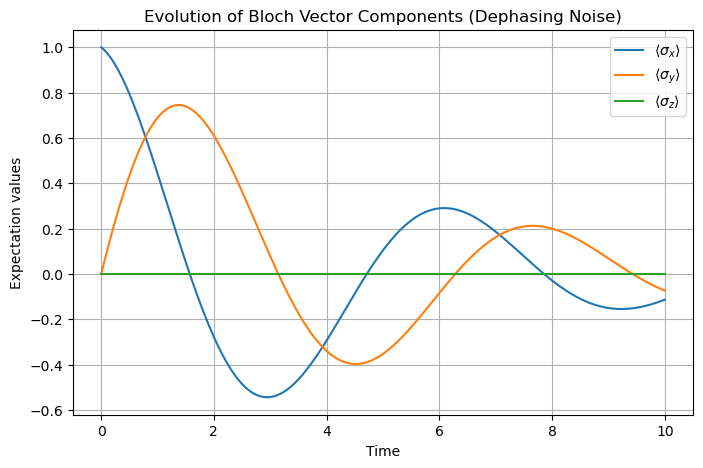

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
omega = 1.0   # Qubit frequency
gamma = 0.1   # Dephasing rate
tlist = np.linspace(0, 10, 200)  # Time range for simulation

# Initial state: Superposition state |+⟩ = (|0⟩ + |1⟩) / sqrt(2)
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# System Hamiltonian: H = ω/2 * σ_z
H = 0.5 * omega * sigmaz()

# Lindblad operator for dephasing: L = sqrt(gamma) * σ_z
c_ops = [np.sqrt(gamma) * sigmaz()]

# Solve the Lindblad master equation
result = mesolve(H, initial_state, tlist, c_ops, [])

# Extract the Bloch vector components
rho_t = result.states  # Density matrices at each time
bloch_x = [expect(sigmax(), rho) for rho in rho_t]
bloch_y = [expect(sigmay(), rho) for rho in rho_t]
bloch_z = [expect(sigmaz(), rho) for rho in rho_t]

# Plot the Bloch vector components
plt.figure(figsize=(8, 5))
plt.plot(tlist, bloch_x, label=r"$\langle \sigma_x \rangle$")
plt.plot(tlist, bloch_y, label=r"$\langle \sigma_y \rangle$")
plt.plot(tlist, bloch_z, label=r"$\langle \sigma_z \rangle$")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.title("Evolution of Bloch Vector Components (Dephasing Noise)")
plt.legend()
plt.grid()
plt.show()


First few density matrices:
Time 0.00: Density Matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]
Time 0.05: Density Matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]
Time 0.10: Density Matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]
Time 0.15: Density Matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]
Time 0.20: Density Matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]


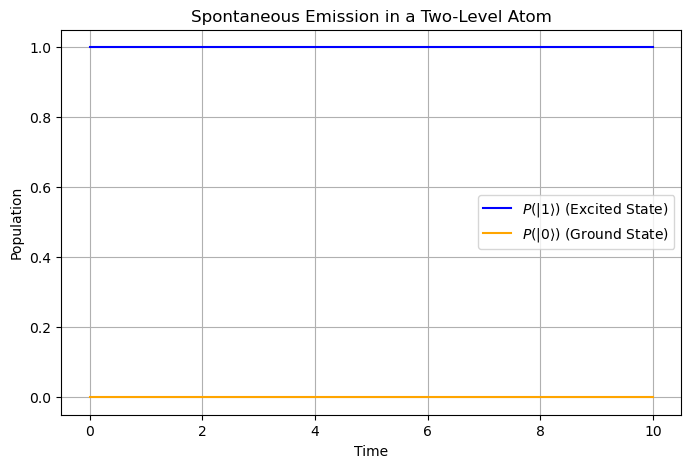

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
gamma = 1.0       # Spontaneous emission rate (set higher for visibility)
tlist = np.linspace(0, 10, 200)  # Time range for simulation

# Initial state: Excited state |1⟩
initial_state = basis(2, 1)

# System Hamiltonian: H = 0 (No coherent evolution for pure spontaneous emission)
H = 2 * sigmaz()

# Lindblad operator for spontaneous emission: L = sqrt(gamma) * σ_-
c_ops = [np.sqrt(gamma) * sigmam()]

# Solve the Lindblad master equation
result = mesolve(H, initial_state, tlist, c_ops, [])

# Debugging: Print the first few density matrices
print("First few density matrices:")
for t, state in zip(tlist[:5], result.states[:5]):
    print(f"Time {t:.2f}: Density Matrix:\n{state}")

# Calculate the populations of |0⟩ and |1⟩ over time
populations_excited = [expect(basis(2, 1) * basis(2, 1).dag(), rho) for rho in result.states]
populations_ground = [expect(basis(2, 0) * basis(2, 0).dag(), rho) for rho in result.states]

# Plot the populations
plt.figure(figsize=(8, 5))
plt.plot(tlist, populations_excited, label=r"$P(|1\rangle)$ (Excited State)", color="blue")
plt.plot(tlist, populations_ground, label=r"$P(|0\rangle)$ (Ground State)", color="orange")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Spontaneous Emission in a Two-Level Atom")
plt.legend()
plt.grid()
plt.show()


/Users/EricSung/opt/anaconda3/envs/open_quantum_systems_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/EricSung/opt/anaconda3/envs/open_quantum_systems_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


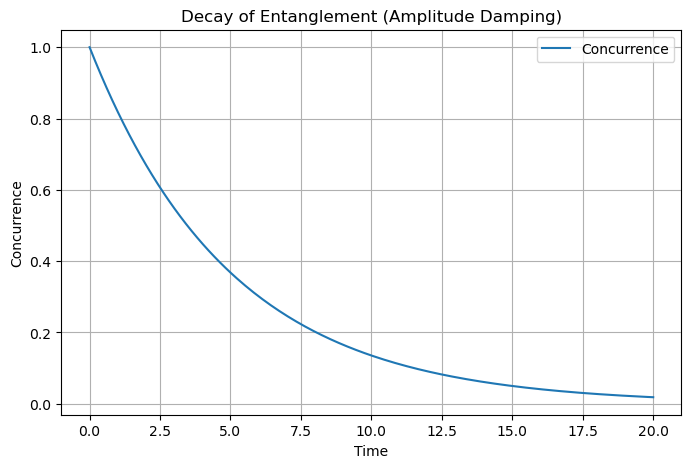

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
gamma = 0.1  # Amplitude damping rate
tlist = np.linspace(0, 20, 200)  # Time range for simulation

# Initial state: Two-qubit Bell state |ψ⟩ = (|00⟩ + |11⟩) / sqrt(2)
bell_state = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()

# Zero Hamiltonian for a two-qubit system
H = Qobj([[0, 0], [0, 0]])  # Zero Hamiltonian for a single qubit
H = tensor(H, qeye(2)) + tensor(qeye(2), H)  # Two-qubit zero Hamiltonian

# Lindblad operators for amplitude damping
c_ops = [
    np.sqrt(gamma) * tensor(destroy(2), qeye(2)),  # Amplitude damping for qubit 1
    np.sqrt(gamma) * tensor(qeye(2), destroy(2))  # Amplitude damping for qubit 2
]

# Solve the Lindblad master equation
result = mesolve(H, bell_state, tlist, c_ops, [])

# Function to compute concurrence
def concurrence(rho):
    # Pauli-Y matrix
    Y = Qobj([[0, -1j], [1j, 0]])
    # Tensor product of Y with itself
    Y_t = tensor(Y, Y)
    # Calculate the "spin-flipped" density matrix
    rho_tilde = Y_t * rho.conj() * Y_t
    # Calculate eigenvalues of the product rho * rho_tilde
    eigvals = (rho * rho_tilde).eigenenergies()
    # Sort eigenvalues and calculate concurrence
    eigvals = np.sqrt(sorted(eigvals, reverse=True))
    return max(0, eigvals[0] - np.sum(eigvals[1:]))

# Calculate concurrence at each time step
concurrences = [concurrence(rho) for rho in result.states]

# Plot the concurrence over time
plt.figure(figsize=(8, 5))
plt.plot(tlist, concurrences, label="Concurrence")
plt.xlabel("Time")
plt.ylabel("Concurrence")
plt.title("Decay of Entanglement (Amplitude Damping)")
plt.grid()
plt.legend()
plt.show()


# Amplitude Damping for Qubit

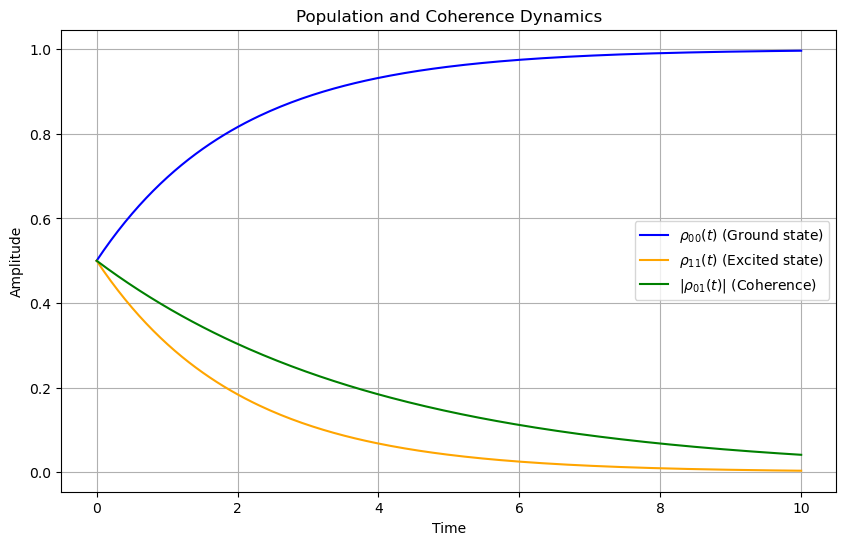

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
gamma = 0.5  # Damping rate
tlist = np.linspace(0, 10, 200)  # Time range for simulation

# Initial state: Superposition state
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Lindblad operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the Lindblad equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract populations and coherences
pop_0 = [expect(basis(2, 0) * basis(2, 0).dag(), state) for state in result.states]
pop_1 = [expect(basis(2, 1) * basis(2, 1).dag(), state) for state in result.states]
coherence = [abs(state.full()[0, 1]) for state in result.states]

# Plot populations
plt.figure(figsize=(10, 6))
plt.plot(tlist, pop_0, label=r"$\rho_{00}(t)$ (Ground state)", color="blue")
plt.plot(tlist, pop_1, label=r"$\rho_{11}(t)$ (Excited state)", color="orange")
plt.plot(tlist, coherence, label=r"$|\rho_{01}(t)|$ (Coherence)", color="green")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Population and Coherence Dynamics")
plt.legend()
plt.grid()
plt.show()


In [7]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
gamma = 0.5  # Damping rate
tlist = np.linspace(0, 10, 200)

# Initial state: Superposition
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Lindblad operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the Lindblad equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract Bloch vectors
bloch_vectors = []
for state in result.states:
    bloch_vectors.append([expect(sigmax(), state), expect(sigmay(), state), expect(sigmaz(), state)])
bloch_vectors = np.array(bloch_vectors)

# Setup the Bloch sphere
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='lightblue', alpha=0.3)

# Plot the trajectory
line, = ax.plot([], [], [], lw=2, color='red')
point, = ax.plot([], [], [], 'ro')

# Set up the plot limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bloch Sphere Trajectory')

# Initialize the animation
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Update function for animation
def update(frame):
    line.set_data(bloch_vectors[:frame, 0], bloch_vectors[:frame, 1])
    line.set_3d_properties(bloch_vectors[:frame, 2])
    point.set_data(bloch_vectors[frame, 0], bloch_vectors[frame, 1])
    point.set_3d_properties(bloch_vectors[frame, 2])
    return line, point

# Create the animation
ani = FuncAnimation(fig, update, frames=len(tlist), init_func=init, blit=False)

# Save or display the animation
# To save as GIF
ani.save("bloch_sphere.gif", writer=PillowWriter(fps=20))

# To display in Jupyter Notebook
plt.show()


<IPython.core.display.Javascript object>

IndexError: list index out of range

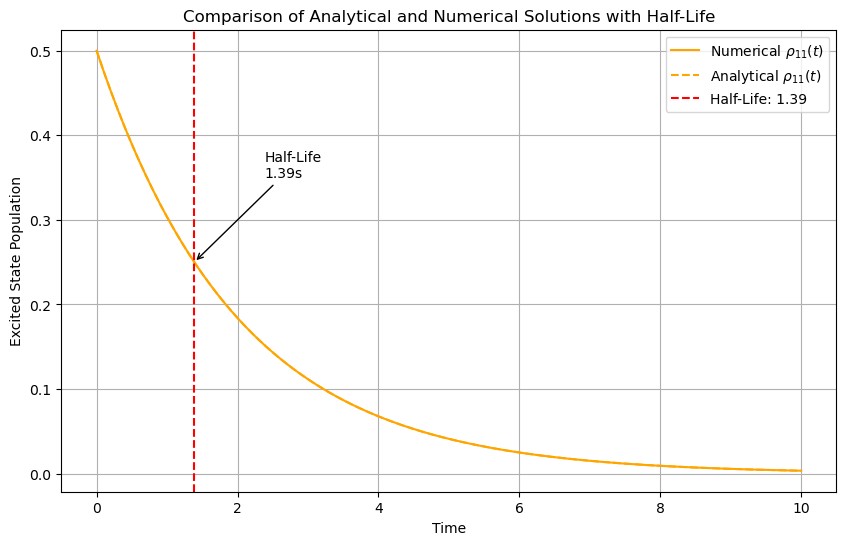

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline

# Parameters
gamma = 0.5  # Damping rate
tlist = np.linspace(0, 10, 200)  # Time range for simulation

# Initial state: Superposition state
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Lindblad operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the Lindblad equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract populations
pop_1_numerical = [expect(basis(2, 1) * basis(2, 1).dag(), state) for state in result.states]

# Analytical solution
pop_1_analytical = [0.5 * np.exp(-gamma * t) for t in tlist]

# Find half-life
half_life = np.log(2) / gamma  # Time when population is reduced by half

# Plot
plt.figure(figsize=(10, 6))
# Correct LaTeX formatting
plt.plot(tlist, pop_1_numerical, label="Numerical $\\rho_{11}(t)$", color="orange", linestyle="-")
plt.plot(tlist, pop_1_analytical, label="Analytical $\\rho_{11}(t)$", color="orange", linestyle="--")
plt.axvline(half_life, color="red", linestyle="--", label=f"Half-Life: {half_life:.2f}")
plt.annotate(f"Half-Life\n{half_life:.2f}s",
             xy=(half_life, 0.25), xytext=(half_life + 1, 0.35),
             arrowprops=dict(arrowstyle="->", color="black"))
plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Comparison of Analytical and Numerical Solutions with Half-Life")
plt.legend()
plt.grid()
plt.show()


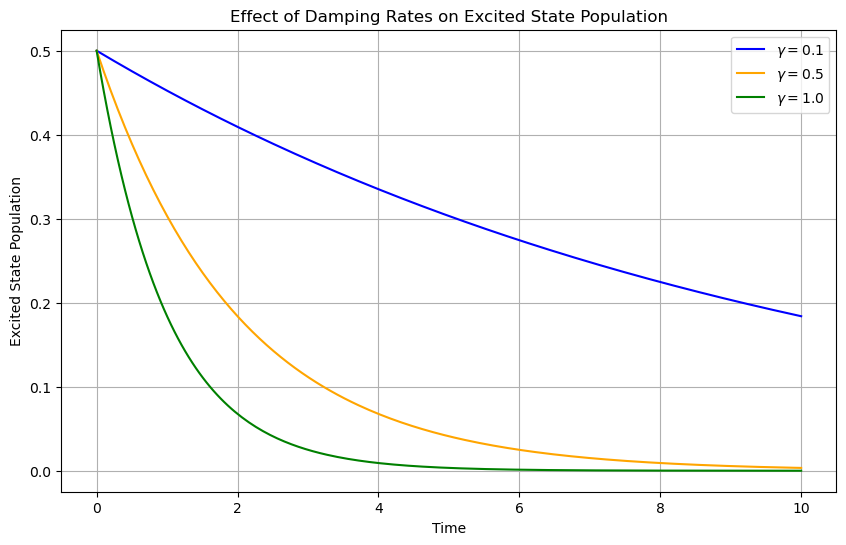

In [20]:
# Parameters for varying damping rates
gammas = [0.1, 0.5, 1.0]  # Different damping rates
colors = ["blue", "orange", "green"]

plt.figure(figsize=(10, 6))

# Solve for each gamma
for i, gamma in enumerate(gammas):
    c_ops = [np.sqrt(gamma) * destroy(2)]
    result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])
    pop_1 = [expect(basis(2, 1) * basis(2, 1).dag(), state) for state in result.states]
    plt.plot(tlist, pop_1, label=f"$\\gamma = {gamma}$", color=colors[i])

plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Effect of Damping Rates on Excited State Population")
plt.legend()
plt.grid()
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\g'
<>:15: SyntaxWarning: invalid escape sequence '\g'
/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_9698/855980176.py:15: SyntaxWarning: invalid escape sequence '\g'
  plt.title("Numerical vs Analytical Solutions for Different $\gamma$")


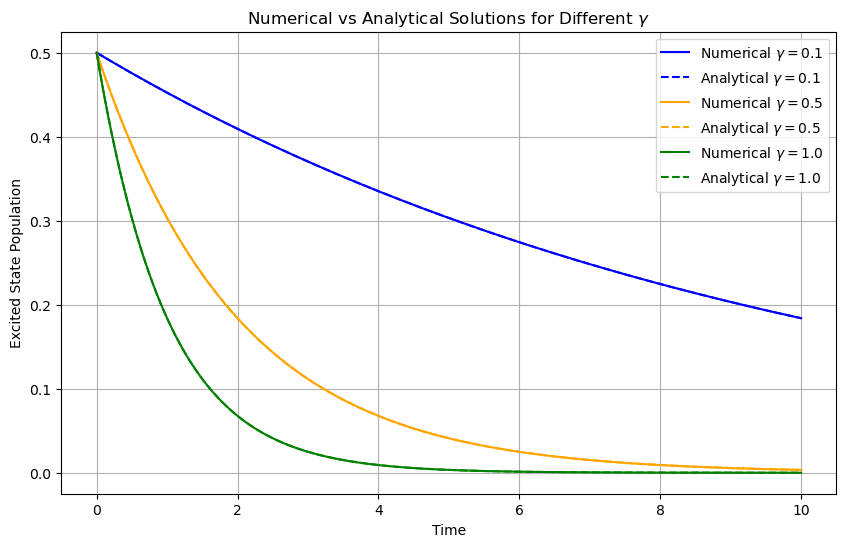

In [24]:
plt.figure(figsize=(10, 6))

# Solve for each gamma
for i, gamma in enumerate(gammas):
    c_ops = [np.sqrt(gamma) * destroy(2)]
    result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])
    pop_1_numerical = [expect(basis(2, 1) * basis(2, 1).dag(), state) for state in result.states]
    pop_1_analytical = [0.5 * np.exp(-gamma * t) for t in tlist]

    plt.plot(tlist, pop_1_numerical, label=f"Numerical $\\gamma = {gamma}$", linestyle="-", color=colors[i])
    plt.plot(tlist, pop_1_analytical, label=f"Analytical $\\gamma = {gamma}$", linestyle="--", color=colors[i])

plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Numerical vs Analytical Solutions for Different $\gamma$")
plt.legend()
plt.grid()
plt.show()


In [26]:
# Coherence magnitude
coherence_numerical = [abs(state.full()[0, 1]) for state in result.states]

plt.figure(figsize=(10, 6))

# Solve for each gamma and annotate decoherence time
for i, gamma in enumerate(gammas):
    c_ops = [np.sqrt(gamma) * destroy(2)]
    result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])
    coherence_numerical = [abs(state.full()[0, 1]) for state in result.states]
    decoherence_time = 1 / gamma  # T2
    plt.plot(tlist, coherence_numerical, label=f"$\\gamma = {gamma}$", color=colors[i])
    plt.axvline(decoherence_time, color=colors[i], linestyle="--", label=f"$T_2 = {decoherence_time:.2f}$")

plt.xlabel("Time")
plt.ylabel("Coherence Magnitude $|\rho_{01}(t)|$")
plt.title("Decoherence Times for Different $\gamma$")
plt.legend()
plt.grid()
plt.show()


<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\g'
/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_9698/3622073366.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.title("Decoherence Times for Different $\gamma$")


ValueError: 
Coherence Magnitude $|ho_{01}(t)|$
                    ^
ParseException: Expected end of text, found '$'  (at char 20), (line:1, col:21)

<Figure size 1000x600 with 1 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
gamma = 0.5  # Damping rate
tlist = np.linspace(0, 10, 200)  # Time range for simulation

# Define different initial states
states = [basis(2, 1), (basis(2, 0) + basis(2, 1)).unit(), basis(2, 0)]
labels = [
    r"Excited State: $\rho_{11}(t)$",
    r"Superposition State: $\rho_{11}(t)$",
    r"Ground State: $\rho_{11}(t)$"
]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Solve and plot for each initial state
for i, state in enumerate(states):
    # Lindblad operator for amplitude damping
    c_ops = [np.sqrt(gamma) * destroy(2)]
    # Solve the Lindblad equation
    result = mesolve(0 * sigmaz(), state, tlist, c_ops, [])
    # Extract excited state populations
    pop_1 = [expect(basis(2, 1) * basis(2, 1).dag(), s) for s in result.states]
    # Plot
    plt.plot(tlist, pop_1, label=labels[i])

# Finalize the plot
plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Amplitude Damping for Different Initial States")
plt.legend()
plt.grid()
plt.show()


ValueError: 
Excited State: $ho_11(t)$
               ^
ParseException: Expected end of text, found '$'  (at char 15), (line:1, col:16)

<Figure size 1000x600 with 1 Axes>

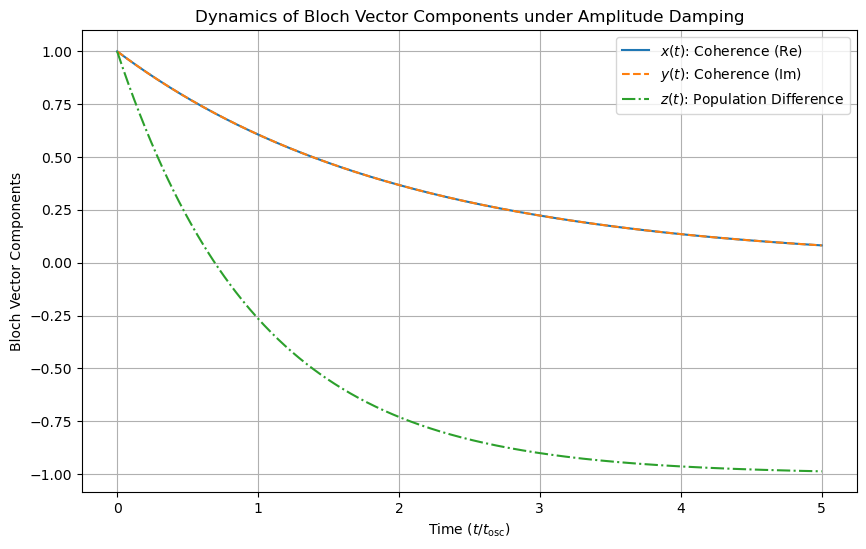

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
gamma = 1.0  # Decay rate
t = np.linspace(0, 5, 500)  # Time points

# Initial conditions
x0 = 1.0
y0 = 1.0
z0 = 1.0

# Solutions for Bloch vector components
x = x0 * np.exp(-gamma * t / 2)
y = y0 * np.exp(-gamma * t / 2)
z = z0 * np.exp(-gamma * t) - (1 - np.exp(-gamma * t))

# Plot x(t), y(t), z(t)
plt.figure(figsize=(10, 6))

# Plot x(t)
plt.plot(t, x, label=r"$x(t)$: Coherence (Re)", linestyle="-")
# Plot y(t)
plt.plot(t, y, label=r"$y(t)$: Coherence (Im)", linestyle="--")
# Plot z(t)
plt.plot(t, z, label=r"$z(t)$: Population Difference", linestyle="-.")

# Customize the plot
plt.title("Dynamics of Bloch Vector Components under Amplitude Damping")
plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Bloch Vector Components")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("/Users/EricSung/Downloads/bloch_vector_components_opti646.pdf", dpi=300)
plt.show()


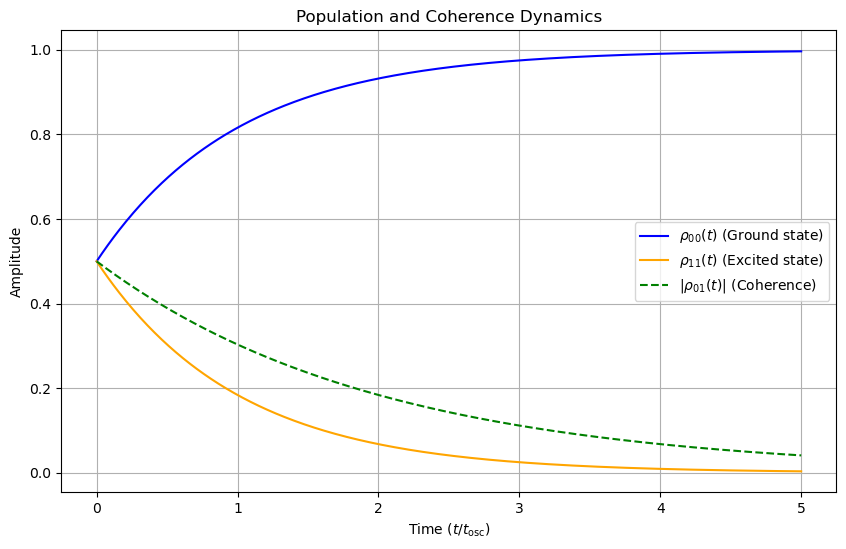

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters matching the earlier code
gamma = 1.0  # Damping rate
tlist = np.linspace(0, 5, 500)  # Time range for simulation

# Initial state: Bloch vector aligned with (1, 1, 1), normalized
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Lindblad operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the Lindblad equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract populations and coherences
pop_0 = [expect(basis(2, 0) * basis(2, 0).dag(), state) for state in result.states]
pop_1 = [expect(basis(2, 1) * basis(2, 1).dag(), state) for state in result.states]
coherence = [abs(state.full()[0, 1]) for state in result.states]

# Plot populations and coherence
plt.figure(figsize=(10, 6))
plt.plot(tlist, pop_0, label=r"$\rho_{00}(t)$ (Ground state)", color="blue")
plt.plot(tlist, pop_1, label=r"$\rho_{11}(t)$ (Excited state)", color="orange")
plt.plot(tlist, coherence, label=r"$|\rho_{01}(t)|$ (Coherence)", color="green", linestyle="--")
plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Amplitude")
plt.title("Population and Coherence Dynamics")
plt.legend()
plt.grid()
plt.savefig('/Users/EricSung/Downloads/population_coherence_dynamics_opti646.pdf', dpi=300)
plt.show()


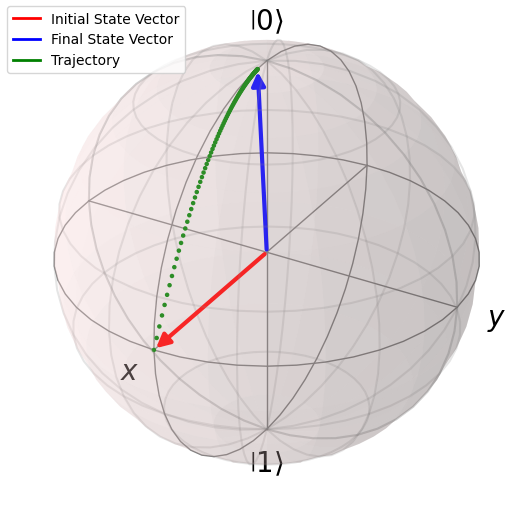

In [42]:
from qutip import Bloch, basis, destroy, sigmax, sigmay, sigmaz, mesolve
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 1.0  # Damping rate
tlist = np.linspace(0, 5, 100)  # Time points for visualization

# Initial state: Bloch vector aligned with (1, 1, 1), normalized
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Collapse operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the master equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract Bloch vector components
x_vals = [expect(sigmax(), state) for state in result.states]
y_vals = [expect(sigmay(), state) for state in result.states]
z_vals = [expect(sigmaz(), state) for state in result.states]

# Create a Bloch sphere visualization
b = Bloch()
b.add_points([x_vals, y_vals, z_vals])  # Add trajectory points
b.add_vectors([x_vals[0], y_vals[0], z_vals[0]])  # Add initial state vector
b.add_vectors([x_vals[-1], y_vals[-1], z_vals[-1]])  # Add final state vector

# Customize the Bloch sphere
b.vector_color = ['red', 'blue']  # Colors for initial and final vectors
b.point_color = 'green'  # Color for trajectory points
b.point_marker = 'o'  # Marker style for points
b.point_size = [5] * len(x_vals)  # Size of trajectory points

# Render the Bloch sphere
b.render()

# Add a legend manually
fig = b.fig
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=2, label='Initial State Vector'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Final State Vector'),
    plt.Line2D([0], [0], color='green', linestyle='-', lw=2, label='Trajectory'),
]
# Add legend to the figure
fig.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Save the Bloch sphere visualization as a PDF
b.fig.savefig('/Users/EricSung/Downloads/bloch_sphere_dynamics_opti646.pdf', dpi=300)

# Show the Bloch sphere
b.show()


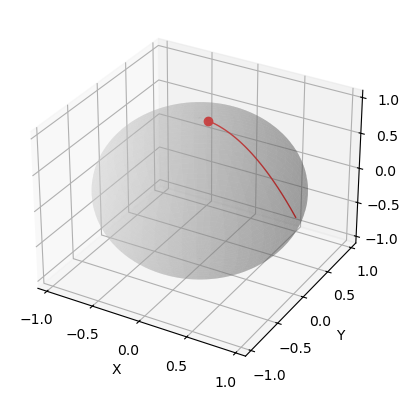

In [44]:
from qutip import basis, destroy, sigmax, sigmay, sigmaz, mesolve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
gamma = 1.0  # Damping rate
tlist = np.linspace(0, 5, 50)  # Time points for visualization

# Initial state: Bloch vector aligned with (1, 1, 1), normalized
initial_state = (basis(2, 0) + basis(2, 1)).unit()

# Collapse operator for amplitude damping
c_ops = [np.sqrt(gamma) * destroy(2)]

# Solve the master equation
result = mesolve(0 * sigmaz(), initial_state, tlist, c_ops, [])

# Extract Bloch vector components
x_vals = [expect(sigmax(), state) for state in result.states]
y_vals = [expect(sigmay(), state) for state in result.states]
z_vals = [expect(sigmaz(), state) for state in result.states]

# Create a Matplotlib 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the Bloch sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightgray', alpha=0.3, linewidth=0)

# Initialize the plot
point, = ax.plot([], [], [], 'ro', markersize=6)
trajectory, = ax.plot([], [], [], 'r-', lw=1)

# Set axis limits
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Update function for animation
def update(num):
    point.set_data([x_vals[num]], [y_vals[num]])
    point.set_3d_properties([z_vals[num]])
    trajectory.set_data(x_vals[:num+1], y_vals[:num+1])
    trajectory.set_3d_properties(z_vals[:num+1])
    return point, trajectory

# Create the animation
ani = FuncAnimation(fig, update, frames=len(tlist), interval=100, blit=True)

# Save the animation as a GIF
ani.save('bloch_sphere_dynamics_opti646.gif', writer='pillow', fps=10)

# Show the plot
plt.show()


In [46]:
basis(2, 1)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]

# Schrödinger Cat Optical Cavity

## Lindblad Dynamics

In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
alpha = 2.0  # Coherent state amplitude
kappa = 0.1  # Photon loss rate
omega = 1.0  # Cavity frequency
tlist = np.linspace(0, 10, 500)  # Time points for simulation
dim = 20

# Define initial Schrödinger cat state
coherent_plus = coherent(dim, alpha) + coherent(dim, -alpha)
psi_cat = coherent_plus.unit()
initial_state = (coherent_plus.unit() * coherent_plus.unit().dag())

# Operators
a = destroy(dim)  # Annihilation operator
H = omega * a.dag() * a  # Hamiltonian
c_ops = [np.sqrt(kappa) * a]  # Collapse operator

# Solve Lindblad master equation
result = mesolve(H, initial_state, tlist, c_ops, [])

# Observables
# 1. Parity operator
parity_op = sum([(-1)**n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)])
parity = expect(parity_op, result.states)

# 2. Wigner function snapshots at selected times
snapshots_times = [0, 5, 10]  # Time points for snapshots
snapshots_indices = [np.argmin(np.abs(tlist - t)) for t in snapshots_times]
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
wigner_snapshots = [wigner(result.states[idx], x, y) for idx in snapshots_indices]




In [5]:
# Create a figure for the animation
fig, ax = plt.subplots(figsize=(5,4))

# Compute Wigner function for the initial state and set up the plot
W = wigner(result.states[0], x, y)
cax = ax.pcolormesh(X, Y, W, shading='auto', cmap='RdBu_r', vmin=-abs(W).max(), vmax=abs(W).max())
ax.set_xlabel('x')
ax.set_ylabel('p')
ax.set_title('Wigner Function at t=0 $(t/t_\\text{{osc}})$')
fig.colorbar(cax, ax=ax)

# Update function for animation
def update(frame):
    state = result.states[frame]
    W = wigner(state, x, y)
    cax.set_array(W.ravel())
    cax.set_clim(-abs(W).max(), abs(W).max())  # Adjust color limits if needed
    ax.set_title(f"(Lindblad) Wigner Function at t={tlist[frame]:.2f} $(t/t_\\text{{osc}})$")
    return [cax]

# Create animation
anim = FuncAnimation(fig, update, frames=len(tlist), blit=False, repeat=False)

# Save animation as GIF using pillow writer
anim.save('wigner_animation_lindblad_opti646.gif', writer='pillow', fps=5)
plt.close(fig)

print("Wigner animation saved as wigner_animation_opti646.gif")

Wigner animation saved as wigner_animation_opti646.gif


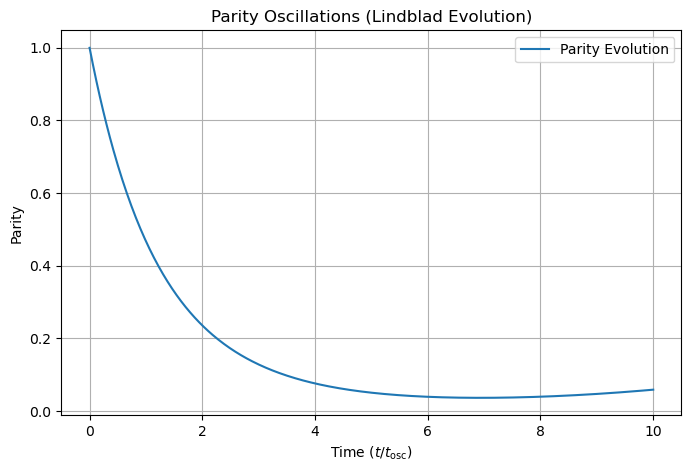

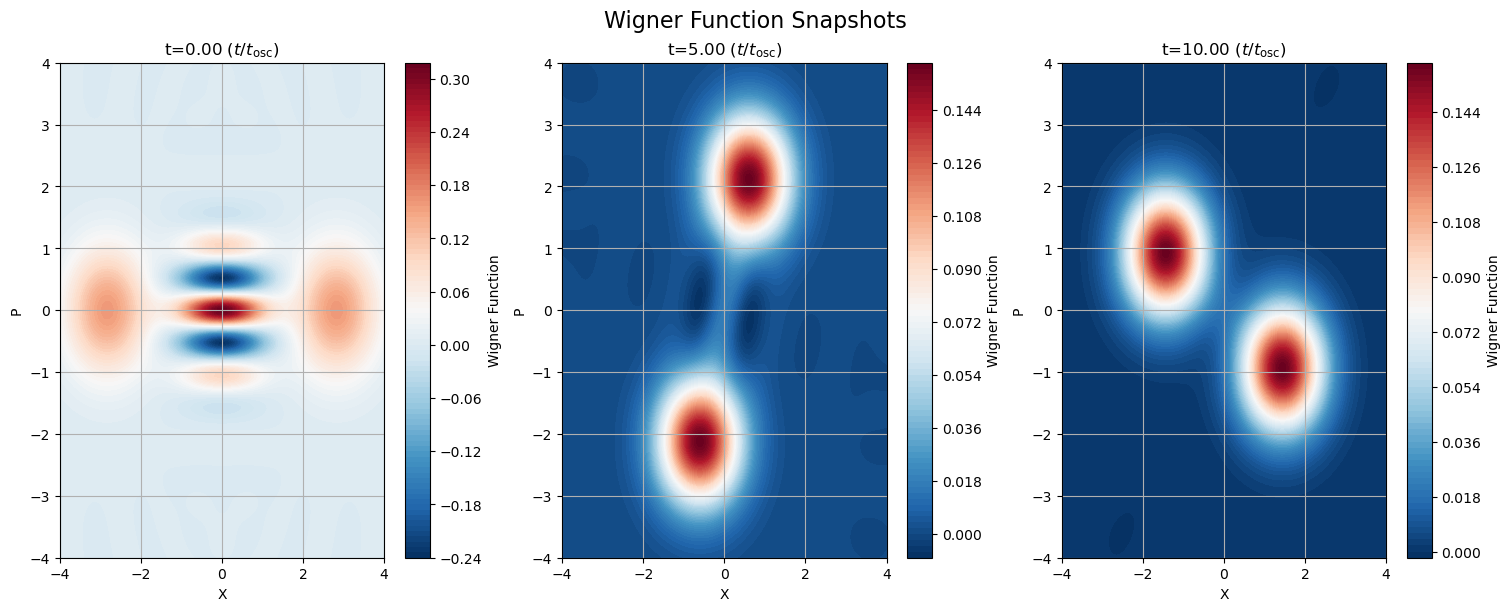

In [24]:
# Save Parity Evolution Plot
plt.figure(figsize=(8, 5))
plt.plot(tlist, parity, label="Parity Evolution")
plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Parity")
plt.title("Parity Oscillations (Lindblad Evolution)")
plt.legend()
plt.grid()
plt.savefig('/Users/EricSung/Downloads/parity_evolution_lindblad_opti646.pdf',dpi=300)  # Save as PDF
plt.show()

# Save Wigner Function Snapshots in a Single Side-by-Side Plot
fig, axes = plt.subplots(1, len(snapshots_times), figsize=(15, 6), constrained_layout=True)

for ax, t, wigner_data in zip(axes, snapshots_times, wigner_snapshots):
    contour = ax.contourf(X, Y, wigner_data, 100, cmap="RdBu_r")
    fig.colorbar(contour, ax=ax, label="Wigner Function")
    ax.set_title(f"t={t:.2f} $(t/t_\\text{{osc}})$")
    ax.set_xlabel("X")
    ax.set_ylabel("P")
    ax.grid()

fig.suptitle("Wigner Function Snapshots", fontsize=16)
plt.savefig("/Users/EricSung/Downloads/wigner_snapshots_lindblad_opti646.pdf", dpi=300)
plt.show()


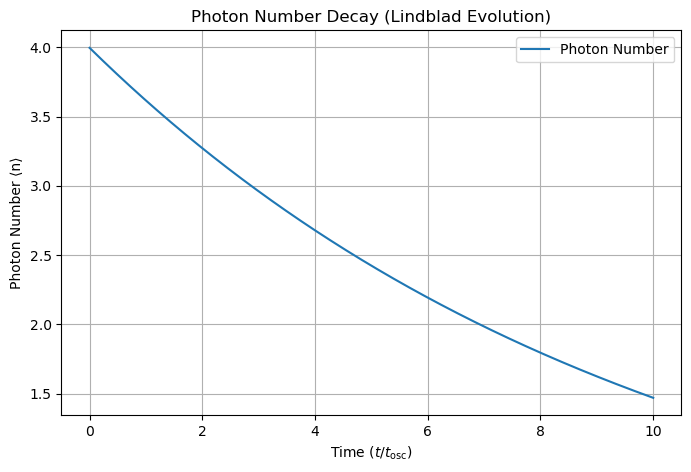

In [25]:
# # 1. Compute fidelity over time
# fidelity_list = []
# for state in result.states:
#     fid = fidelity(state, psi_cat)
#     fidelity_list.append(fid)


# 2. Photon number expectation value
photon_number_op = a.dag() * a
photon_number = expect(photon_number_op, result.states)

# # Plot fidelity
# plt.figure(figsize=(8,5))
# plt.plot(tlist, fidelity_list, label="Fidelity with Cat State")
# plt.xlabel("Time")
# plt.ylabel("Fidelity")
# plt.title("Fidelity Decay (Lindblad Evolution)")
# plt.grid()
# plt.legend()
# plt.show()

# Plotting Photon Number
plt.figure(figsize=(8, 5))
plt.plot(tlist, photon_number, label="Photon Number")
plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Photon Number ⟨n⟩")
plt.title("Photon Number Decay (Lindblad Evolution)")
plt.legend()
plt.grid()
plt.savefig('/Users/EricSung/Downloads/photon_number_lindblad_opti646.pdf',dpi=300)  # Save as PDF
plt.show()


## Poisson Unraveling Dynamics

10.0%. Run time:   0.59s. Est. time left: 00:00:00:05
20.0%. Run time:   1.13s. Est. time left: 00:00:00:04
30.0%. Run time:   1.67s. Est. time left: 00:00:00:03
40.0%. Run time:   2.22s. Est. time left: 00:00:00:03
50.0%. Run time:   2.76s. Est. time left: 00:00:00:02
60.0%. Run time:   3.50s. Est. time left: 00:00:00:02
70.0%. Run time:   4.36s. Est. time left: 00:00:00:01
80.0%. Run time:   5.38s. Est. time left: 00:00:00:01
90.0%. Run time:   6.14s. Est. time left: 00:00:00:00
100.0%. Run time:   6.88s. Est. time left: 00:00:00:00
Total run time:   7.16s
10.0%. Run time:   1.61s. Est. time left: 00:00:00:14
20.0%. Run time:   2.99s. Est. time left: 00:00:00:11
30.0%. Run time:   4.54s. Est. time left: 00:00:00:10
40.0%. Run time:   5.95s. Est. time left: 00:00:00:08
50.0%. Run time:   7.84s. Est. time left: 00:00:00:07
60.0%. Run time:  10.46s. Est. time left: 00:00:00:06
70.0%. Run time:  12.07s. Est. time left: 00:00:00:05
80.0%. Run time:  13.44s. Est. time left: 00:00:00:03
90.

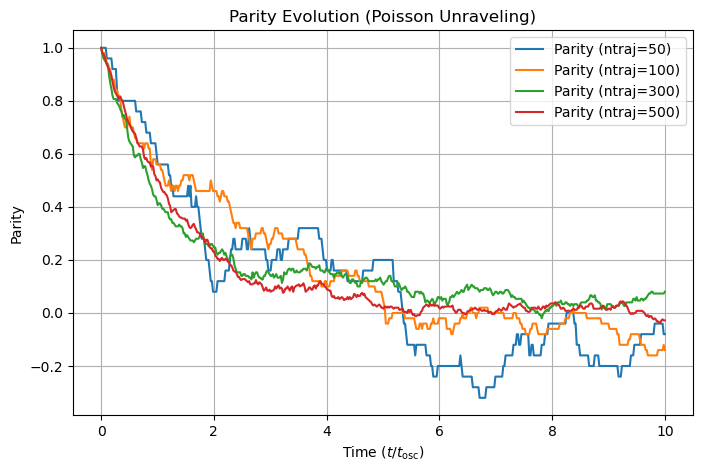

10.0%. Run time:   0.78s. Est. time left: 00:00:00:06
20.0%. Run time:   1.57s. Est. time left: 00:00:00:06
30.0%. Run time:   2.60s. Est. time left: 00:00:00:06
40.0%. Run time:   3.59s. Est. time left: 00:00:00:05
50.0%. Run time:   4.32s. Est. time left: 00:00:00:04
60.0%. Run time:   5.08s. Est. time left: 00:00:00:03
70.0%. Run time:   5.68s. Est. time left: 00:00:00:02
80.0%. Run time:   6.55s. Est. time left: 00:00:00:01
90.0%. Run time:   7.63s. Est. time left: 00:00:00:00
100.0%. Run time:   8.51s. Est. time left: 00:00:00:00
Total run time:   8.64s
10.0%. Run time:   1.54s. Est. time left: 00:00:00:13
20.0%. Run time:   3.24s. Est. time left: 00:00:00:12
30.0%. Run time:   5.22s. Est. time left: 00:00:00:12
40.0%. Run time:   6.62s. Est. time left: 00:00:00:09
50.0%. Run time:   7.76s. Est. time left: 00:00:00:07
60.0%. Run time:   8.93s. Est. time left: 00:00:00:05
70.0%. Run time:  10.45s. Est. time left: 00:00:00:04
80.0%. Run time:  12.22s. Est. time left: 00:00:00:03
90.

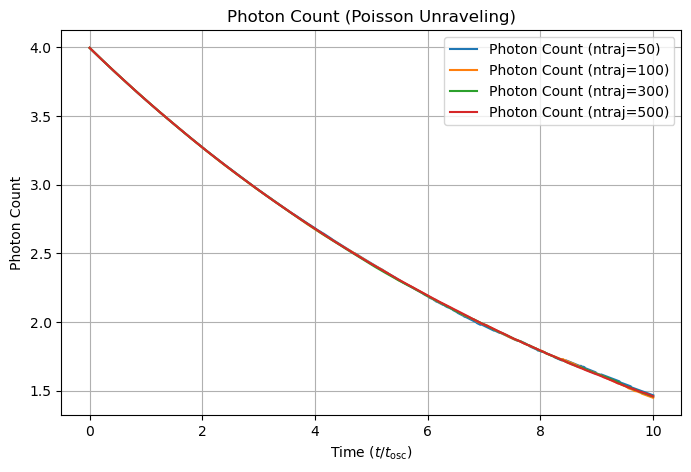

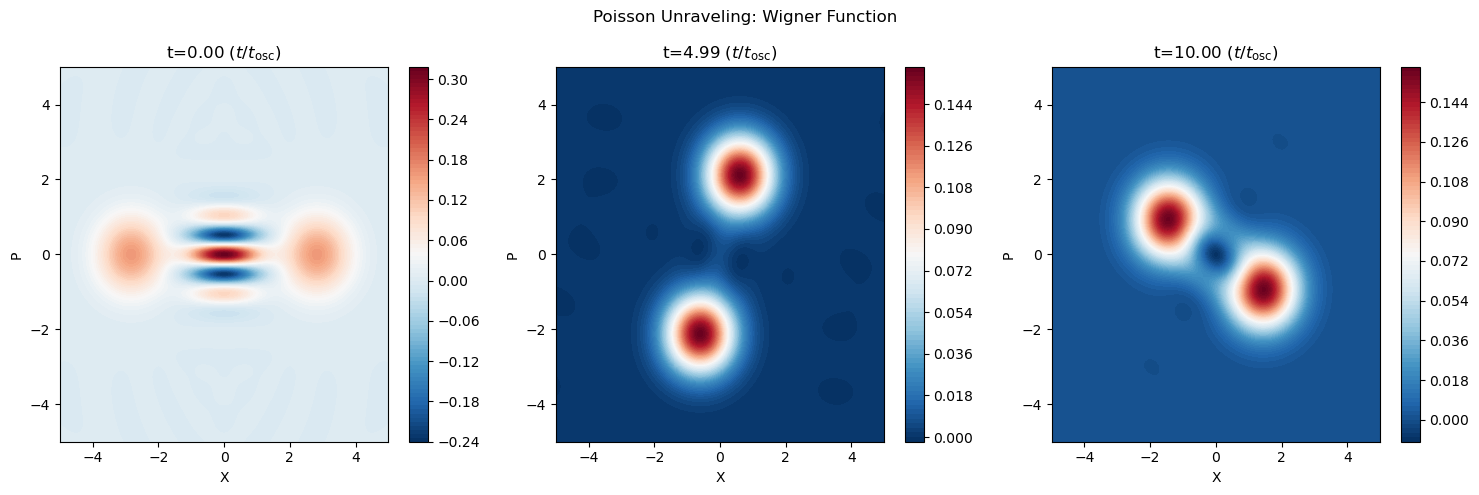

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.0  # Coherent state amplitude
kappa = 0.1  # Photon loss rate
omega = 1.0  # Cavity frequency
tlist = np.linspace(0, 10, 500)  # Time points for simulation
dim = 20

# Initial cat state
coherent_plus = coherent(dim, alpha) + coherent(dim, -alpha)
psi_cat = coherent_plus.unit()

# Operators
a = destroy(dim)
H = omega * a.dag() * a
c_ops = [np.sqrt(kappa) * a]

# Parity operator
parity_op = sum(
    [(-1) ** n * basis(dim, n) * basis(dim, n).dag() for n in range(dim)]
)

# Photon number operator
photon_op = a.dag() * a

# Different ntraj values to compare
ntraj_list = [50, 100, 300, 500]

# Parity Evolution
plt.figure(figsize=(8, 5))

# Run Monte Carlo simulations and plot parity evolution
poisson_result = None  # Placeholder to store the last mcsolve result
for ntraj in ntraj_list:
    # Run Monte Carlo simulation
    mc_result = mcsolve(H, psi_cat, tlist, c_ops=c_ops, ntraj=ntraj)
    poisson_result = mc_result  # Save the last result for Wigner snapshots
    # Compute parity expectation values
    poisson_parity = expect(parity_op, mc_result.states)
    # Plot the result
    plt.plot(tlist, poisson_parity, label=f"Parity (ntraj={ntraj})")

plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Parity")
plt.title("Parity Evolution (Poisson Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig('/Users/EricSung/Downloads/parity_evolution_poisson_opti646.pdf', dpi=300)  # Save as PDF
plt.show()

# Photon Number Evolution
plt.figure(figsize=(8, 5))

for ntraj in ntraj_list:
    # Run Monte Carlo simulation (reuse mc_result)
    mc_result = mcsolve(H, psi_cat, tlist, c_ops=c_ops, ntraj=ntraj)
    # Compute photon number expectation values
    photon_count = expect(photon_op, mc_result.states)
    # Plot the result
    plt.plot(tlist, photon_count, label=f"Photon Count (ntraj={ntraj})")

plt.xlabel("Time $(t/t_{\\text{osc}})$")
plt.ylabel("Photon Count")
plt.title("Photon Count (Poisson Unraveling)")
plt.legend()
plt.grid(True)
plt.savefig('/Users/EricSung/Downloads/photon_count_poisson_opti646.pdf', dpi=300)  # Save as PDF
plt.show()

# Function to plot Wigner snapshots
def plot_wigner_snapshots_at_times(states, times, snapshot_times, title, x_range=5, y_range=5):
    x = np.linspace(-x_range, x_range, 200)
    y = np.linspace(-y_range, y_range, 200)
    X, Y = np.meshgrid(x, y)

    # Find the indices in 'states' corresponding to the desired snapshot times
    snapshot_indices = [np.argmin(np.abs(times - t)) for t in snapshot_times]

    fig, axes = plt.subplots(1, len(snapshot_indices), figsize=(5 * len(snapshot_indices), 5))

    if len(snapshot_indices) == 1:
        # If there's only one time, axes might not be an array
        axes = [axes]

    for i, idx in enumerate(snapshot_indices):
        state = states[idx]
        # Convert pure states to density matrices if needed
        if state.isket:
            state = state * state.dag()
        W = wigner(state, x, y)
        ax = axes[i]
        c = ax.contourf(X, Y, W, 100, cmap="RdBu_r")
        ax.set_title(f"t={times[idx]:.2f} $(t/t_\\text{{osc}})$")
        ax.set_xlabel("X")
        ax.set_ylabel("P")
        fig.colorbar(c, ax=ax)

    fig.suptitle(title)
    plt.tight_layout()
    plt.savefig('/Users/EricSung/Downloads/wigner_poisson_opti646.pdf', dpi=300)  # Save as PDF
    plt.show()

# Wigner snapshots
snapshot_times = [0, 5, 10]  # The times at which you want Wigner snapshots
if poisson_result:
    plot_wigner_snapshots_at_times(poisson_result.states, tlist, snapshot_times, "Poisson Unraveling: Wigner Function")
else:
    print("No valid simulation result available for Wigner snapshot plotting.")


In [3]:
from matplotlib.animation import FuncAnimation

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(5, 4))

# Prepare phase space grid
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Compute Wigner function for the initial state and set up the plot
if poisson_result:
    state = poisson_result.states[0]  # First state
    if state.isket:
        state = state * state.dag()
    W = wigner(state, x, y)
    cax = ax.pcolormesh(X, Y, W, shading='auto', cmap='RdBu_r', vmin=-abs(W).max(), vmax=abs(W).max())
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.set_title('(Poisson) Wigner Function at t=0 $(t/t_\\text{{osc}})$')
    fig.colorbar(cax, ax=ax)

    # Update function for animation
    def update(frame):
        state = poisson_result.states[frame]
        if state.isket:
            state = state * state.dag()
        W = wigner(state, x, y)
        cax.set_array(W.ravel())
        cax.set_clim(-abs(W).max(), abs(W).max())  # Adjust color limits dynamically
        ax.set_title(f"(Poisson) Wigner Function at t={tlist[frame]:.2f} $(t/t_\\text{{osc}})$")
        return [cax]

    # Create animation
    anim = FuncAnimation(fig, update, frames=len(tlist), blit=False, repeat=False)

    # Save animation as GIF
    anim.save('wigner_animation_poisson_opti646.gif', writer='pillow', fps=10)
    plt.close(fig)
else:
    print("No valid simulation result available for Wigner animation.")
